Жданова Яна ИУ5-64Б


# Лабораторная работа 3
# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
# Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
6. Сравните метрики качества исходной и оптимальной моделей.

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder


In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Импорт и обработка данных

In [ ]:
df = pd.read_csv('winequality-red.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


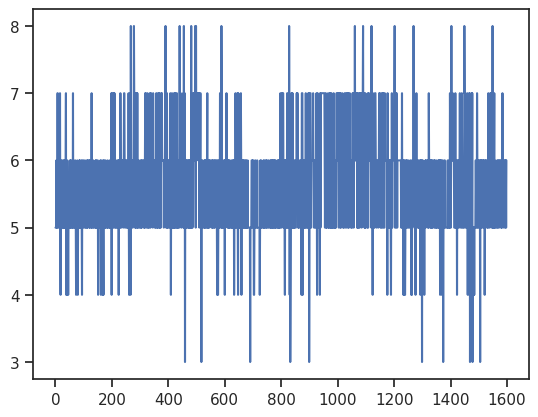

In [ ]:
plt.plot(df.quality	)

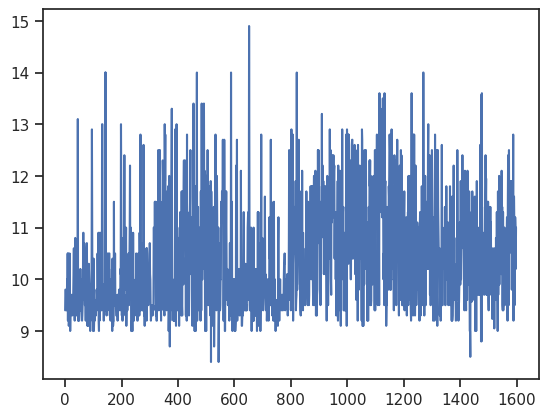

In [ ]:
plt.plot(df.alcohol	)

Проверка необходимости обработки пропусков и исправления данных:

In [ ]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# проверим есть ли пропущенные значения
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Выполнение задания

### С использованием метода train_test_split разделим выборку на обучающую и тестовую.

In [ ]:
# Признаки без целевой переменной
x = df.drop('quality', axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# Целевая переменная
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#20% данных будут отложены для тестирования, а 80% будут использованы для обучения модели

In [ ]:
# Размер обучающей выборки
x_train.shape, y_train.shape

((1279, 11), (1279,))

In [ ]:
# Размер тестовой выборки
x_test.shape, y_test.shape

((320, 11), (320,))

##Обучим модель ближайших соседей для произвольно заданного гиперпараметра K.

In [ ]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=30)
KNeighborsRegressorObj

KNeighborsRegressor(n_neighbors=30)

In [ ]:
KNeighborsRegressorObj.fit(x_train, y_train)
KNeighborsRegressorObj.predict(x_test)
res_pred = KNeighborsRegressorObj.predict(x_test)
print (res_pred)

[5.56666667 5.3        6.1        5.76666667 6.16666667 6.06666667
 5.8        5.16666667 5.66666667 5.1        5.63333333 5.36666667
 5.33333333 5.4        5.4        5.46666667 5.8        5.23333333
 5.4        5.63333333 5.6        6.         5.5        6.2
 5.43333333 5.96666667 5.7        5.23333333 5.7        5.23333333
 5.93333333 6.26666667 5.46666667 5.83333333 5.46666667 5.76666667
 5.36666667 5.6        5.7        5.36666667 5.9        5.1
 5.76666667 5.93333333 5.         5.33333333 5.5        4.9
 5.16666667 6.13333333 5.1        5.43333333 5.93333333 5.1
 5.7        6.53333333 6.         6.1        6.13333333 5.26666667
 5.4        5.13333333 5.53333333 5.33333333 5.1        5.4
 5.96666667 5.46666667 5.43333333 6.13333333 5.46666667 6.16666667
 5.7        5.66666667 5.63333333 5.93333333 5.86666667 5.53333333
 5.03333333 5.93333333 6.13333333 5.03333333 5.         5.7
 5.93333333 5.03333333 5.06666667 6.06666667 5.63333333 5.83333333
 5.43333333 5.6        5.6        5.4

In [ ]:
res_pred_rounded = res_pred.astype(np.int64)
print (res_pred_rounded)

[5 5 6 5 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5 5 6 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 4 5 6 5 5 5 5 5 6 6 6 6 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5
 5 5 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5 5 5 5 6 5 5 5 6
 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5
 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 4 5 5 5 5 5 5 6 6
 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 5]


##Оцените качество модели с помощью подходящих для задачи метрик.

In [ ]:
mean_absolute_error(y_test, res_pred_rounded)

0.625

In [ ]:
mean_squared_error(y_test, res_pred_rounded)

0.8

In [ ]:
median_absolute_error(y_test, res_pred_rounded)

1.0

In [ ]:
r2_score(y_test, res_pred_rounded)

-0.4062312247875719

In [ ]:
mape = np.mean(np.abs((y_test - res_pred_rounded) / y_test)) * 100
print(mape)

10.526785714285714


##Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели.

In [ ]:
n_range = np.array(range(5,100,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
         39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
         56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
         73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
         90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}]

In [ ]:
clf_gs = GridSearchCV(KNeighborsRegressorObj, tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf_gs.fit(x_train, y_train)
print("Лучшее значение K:", clf_gs.best_params_['n_neighbors'])

Лучшее значение K: 12


In [ ]:
clf_rs = RandomizedSearchCV(KNeighborsRegressorObj, tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf_rs.fit(x_train, y_train)
print("Лучшее значение K:", clf_rs.best_params_['n_neighbors'])

Лучшее значение K: 13


In [ ]:
#K-Fold
kf = KFold(n_splits=30)

In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=12),
                         x_train, y_train, scoring='r2',
                         cv=kf)
scores, np.mean(scores)

(array([ 0.2093277 ,  0.2571561 ,  0.10763385, -0.08814872,  0.08065218,
         0.11386183,  0.13115556,  0.06675602,  0.01851016,  0.09748134,
         0.24850975,  0.15774223, -0.02296758,  0.1433162 ,  0.42420131,
         0.07621251,  0.18922559,  0.33428738,  0.31720938,  0.20995146,
         0.13787226,  0.05336257,  0.00455729,  0.10069444, -0.06508779,
         0.24911918,  0.2967495 , -0.0626943 ,  0.3860429 ,  0.17740189]),
 0.14500307379961708)

In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=30),
                         x_train, y_train, scoring='r2',
                         cv=kf)
scores, np.mean(scores)

(array([ 0.22723512,  0.19752056,  0.17051121, -0.03508688, -0.13366293,
         0.07249948,  0.17300074,  0.05722473, -0.00902938,  0.14      ,
         0.18870986,  0.02078813,  0.06739035,  0.08727863,  0.41416851,
         0.07731334,  0.18234848,  0.31288456,  0.19749393,  0.27978155,
         0.15708647,  0.07853801, -0.04104167,  0.09192913,  0.03093291,
         0.22871324,  0.24809739, -0.03305009,  0.26257973,  0.08122324]),
 0.12644594624464364)

In [ ]:
#Repeated K-Fold
rkf = RepeatedKFold(n_splits=5, n_repeats=3)

In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=12),
                         x_train, y_train, scoring='r2',
                         cv=rkf)
scores, np.mean(scores)

(array([0.12763777, 0.23547803, 0.1865166 , 0.17822495, 0.06001597,
        0.17655604, 0.1697122 , 0.18654272, 0.15704557, 0.16925348,
        0.13055285, 0.20142765, 0.12302959, 0.17305726, 0.16657321]),
 0.16277492650001366)

In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=30),
                         x_train, y_train, scoring='r2',
                         cv=rkf)
scores, np.mean(scores)

(array([0.07437045, 0.11378515, 0.22441224, 0.11781208, 0.14223608,
        0.09169143, 0.1282907 , 0.17553993, 0.19478749, 0.08916713,
        0.06521876, 0.14668012, 0.12401253, 0.06289134, 0.19421346]),
 0.12967392669846695)